# [개념정리]

## 01. 회귀 소개 
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한개의 종속 변수 간의 상관관계를 모델링하는 기법을 통칭
- 회귀계수가 중요 - 선형이면 선형회귀, 비선형이면 비선형 회귀. 선형회귀가 가장 많이 사용됨
- 독립변수의 개수에 따라 1개면 단일 회귀, 2개 이상이면 다중 회귀

### 선형 회귀 
- 실제 값과 예측 값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제 방법에 따라 종류 나뉨 (일반 선형 회귀, 릿지, 라쏘 등)

## 02. 단순 선형 회귀를 통한 회귀 이해 
- 독립변수와 종속변수가 하나인 선형 회귀.
- 직선의 형태로 표현 가능, 즉 1차 함수식으로 모델링 가능
- 기울기를 w1, 절편을 w0
- 잔차의 합이 최소가 되는 모델이 최적의 모델
- 보통 오류합을 계산할 때에는 절대값을 취해 더하거나 오류값의 제복을 구해 더한다. RSS 방식이 일반적이고 변수로 구성되는 RSS를 비용함수[손실함수]라고 함.

## 03. 비용 최소화하기 - 경사하강법(Gradient Descent) 소개
- 고차원 방정식에 대한 문제 해결 및 비용함수 최소화
- 점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 파라미터를 구하는 방식
- 반복적으로 예측값과 실제값의 차이가 작아지는 방향성을 가지고 파라미터를 지속적으로 보정. 오류가 더이상 작아지지 않으면 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 변환
- 수행 시간이 오래 걸린다는 단점이 존재. (실전에서는 확률적 경사 하강법을 더 이용 - 일부 데이터만 이용해 파라미터가 업데이트되는 값을 계산. / 혹은 미니 배치 확률적 경사 하강법[stochastic_gradient_descent_steps()] 이용)

## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측 

### LinearRegression 클래스 
- 예측 값과 실제 값의 RSS를 최소화해 OLS 추정 방식(입력 피처의 독립성에 많은 영향을 받고, 피처 간 상관관계가 매우 높은 경우 다중공산성 문제 발생 - PCA를 통해 차원 축소를 수행)으로 구현한 클래스
- fit() 메서드로 X,y 배열을 입력받으면 회귀 계수인 w를 coef() 속성에 저장

### 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절댓값으로 변환해 평균
- MSE : 실제값과 예측값의 차이를 제곱해 평균
- RMSE : MSE에 루트를 씌운 값. (실제 오류 평균보다 커지는 것을 방지하기 위함임!)
- RMSLE : RMSE에 로그를 씌운 값
- R square : 분산 기반으로 예측 성능 평가하며 1에 가까울수록 예측 정확도가 높음
- scoring 함수에 회귀 평가 지표를 적용할 때 MAE는 음수가 될 수 없으며, 회귀 평가 지표는 오류의 차이를 기반으로 하므로 값이 커지면 좋지 못한 모델이라는 의미이므로 이를 일반적으로 반영하기 위해서는 보정이 필요. 보정 방법은 -1을 원래의 평가 지표 값에 곱해서 음수로 만들어 작은 오류 값이 더 큰 숫자로 인식하게 하는 것.

## 05. 다항 회귀와 과(대)적합/과소적합 이해
- 다항회귀 : 다항식으로 표현되는 회귀로 선형회귀에 해당한다.
- 예측 성능이 더 높음
- 사이킷런에서 다항 회귀 클래스를 명시적으로 제공하지 않으므로 PolynomialFeatures 클래스를 통해 피처를 Polynomial 피처로 변환해야 함.

- 다항 회귀의 차수가 높아질 수록 복잡한 피처 간의 관계 모델링 가능하지만, 학습 데이터에만 최적화된 학습이 이루어져 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐. -> 과적합 문제 발생(비상식적으로 높은 수준의 MSE 값이 형성)
- 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델이 좋은 모델

### 편향-분산 트레이드오프
- 고편향성 : 매우 단순화되어 한 방향성으로 치우친 경향
- 고분산성 : 학습 데이터 하나하나의 특성을 반영하여 매우 복잡한 모델을 형성
- 편향과 분산은 한쪽이 높아지면 한쪽이 낮아지는 특성을 지님
- 편향이 높으면 과소적합, 분산이 높으면 과적합.
- 그러므로 서로 트레이드오프를 이루며 오류 cost의 값이 최대로 낮아지는 효율적인 머신러닝 예측 모델 구축이 목표!

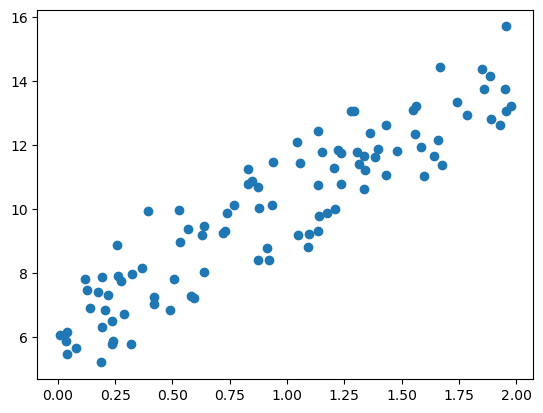

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


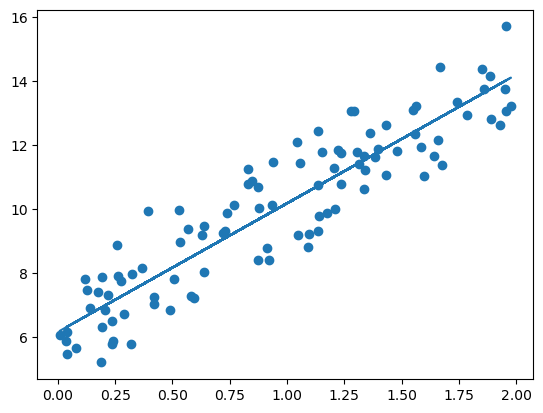

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y= y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1- w1_update
        w0 = w0 - w0_update

    return w1,w0

In [8]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0 6.156
Stochastic Gradient Descent Total Cost : 0.9937


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1) #normalize=False 지원 안됨

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 원본 데이터 URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# 텍스트 데이터 로딩 및 전처리
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터 분리 및 결합
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # 설명 변수 (13개)
y = raw_df.values[1::2, 2]  # 타겟 값 (PRICE)

# 컬럼명 (scikit-learn 기준)
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# DataFrame 생성
bostonDF = pd.DataFrame(X, columns=column_names)
bostonDF["PRICE"] = y

# 데이터 확인
print('Boston 데이터 셋 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 셋 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


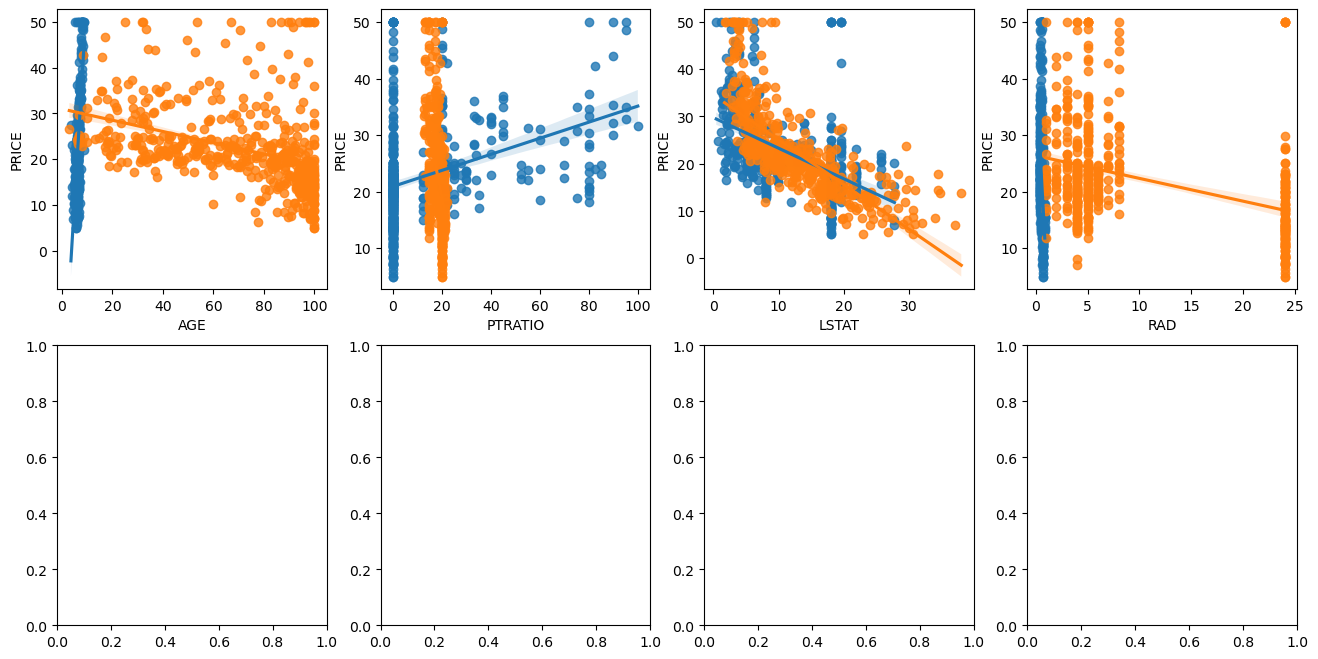

In [11]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(1/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_,1))

절편 값 :  40.9955951721644
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [22]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [30]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
                   
model = model.fit(X, y)
                 
print( 'Polynomial 회귀 계수\n', np.round (model.named_steps[ 'linear' ] .coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [44]:
import numpy as np
import matplotlib.pyplot as pit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X) : 
    return np.cos(1.5 * np.pi * X)

# 수는 0부터 1 까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 tr나e_fun()에서 약간의 노이즈 변동 값을 더한 값입니다

y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.043208749872317896 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899500e+05 -1.87416382e+06  2.03716564e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562771e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08] 입니다.
Degree 15 MSE 는 182663732.5628118 입니다.


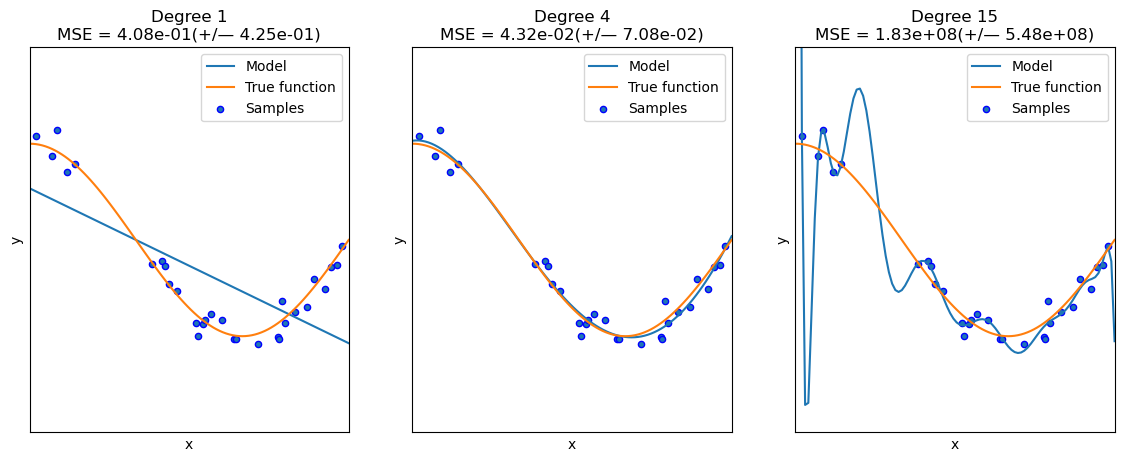

In [77]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다
for i in range(len(degrees)): 
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])  
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)

    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps[’객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print ('\nDegree {0} 회귀 계수는 {1} 입니다.'.format (degrees [i], np.round(coefficients, 2)))
    print ('Degree {0} MSE 는 {1} 입니다.'.format (degrees [i], -1 *np. mean (scores)))# 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다

    #0부터 1까지 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    pit.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #실제 값 곡선
    pit.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    pit.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1 )); plt.ylim((-2, 2)); pit.legend(loc="best")
    pit.title("Degree {}\nMSE = {:.2e}(+/— {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
                                                                                       
plt.show()